# Overview #

## Project Info ##

- Developed by: Sean Pritchard
- for: CSCA 5632: Unsupervised Algorithms in Machine Learning Final Project
- URL: https://github.com/seanpritchard94/dermatology
- Data Source: https://archive.ics.uci.edu/dataset/33/dermatology
- Python version: 3.13

## Data Collection and Provenance ##

This data was originally collected by Nilsel Ilter, M.D., Ph.D., Gazi University, School of Medicine, Ankara, Turkey and H. Altay Guvenir, PhD., Bilkent University, Department of Computer Engineering and Information Science, Ankara, Turkey.

The data collection procedure is described as:
> "Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope
> In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible,and 1, 2 indicate the relative intermediate values." (Ilter, N. & Guvenir, H., 1998)

## Unsupervised Learning Problem Description ##

This project will use unsupervised machine learning techniques including KMeans, Agglomerative Clustering, and Matrix Factorization to cluster the data samples. The results of clustering will then be compared to the labels to determine accuracy. Additionally, supervised machine learning techniques will be used and results will be compared with the unsupervised clustering.

The researchers who collected the data describe the challenge of differential diagnosis of erythemato-squamous as follows:

> The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. (Ilter, N. & Guvenir, H., 1998)

Because of the challenges in performing differential diagnosis, a machine learning model that can accurately assist in this task would be valuable to dermatologists.

**Type of Learning and Task:** This is a **multiclass classification** machine learning problem. I will evaluate **unsupervised clustering algorithms** including KMeans, Agglomerative Clustering, **matrix factorization** including Nonnegative Matrix Factorization, and **supervised learning algorithms** including Random Forest to determine which performs best with this dataset.

**Project Goal:** Determine the effectiveness of various machine learning algorithms and identify the best machine learning algorithm for accurately identifying the underlying disease when a patient presents with erythemato-squamous symptoms.



In [79]:
#import various libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import kmeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Exploratory Data Analysis, Visualization, and Cleaning #

## Data Cleaning ##

The first step will be to load the data from its raw form and clean it. The original researchers did not provide column names in the data file itslef (but did provide them in other documentation). So we will assign column names. We will also imput missing data to the mean of the data set.


In [80]:
column_names = [
    'erythema',
    'scaling'
    'definite_borders',
    'itching',
    'koebner_phenomenon',
    'polygonal_papules',
    'follicular_papules',
    'oral_mucosal_involvement',
    'knee_and_elbow_involvement',
    'family_history',
    'scalp_involvement',
    'melanin_incontinence',
    'eosinophils_infiltrate',
    'PNL_infiltrate',
    'papillary_dermis_fibrosis',
    'exocytosis',
    'acanthosis',
    'hyperkeratosis',
    'parakeratosis',
    'rete_ridges_clubbing',
    'rete_ridges_elongation',
    'suprapapillary_epidermis_thinning',
    'spongiform_pustule',
    'munro_microabcess',
    'focal_hypergranulosis'
    'granular_layer_disappearance',
    'basal_layer_vacuolisation',
    'spongiosis',
    'sawtooth_retes',
    'follicular_horn_plug',
    'perifollicular_parakeratosis',
    'inflammatory_monoluclear_inflitrate',
    'band_like_infiltrate',
    'age',
    'diagnosis'
]

df = pd.read_csv('data/dermatology.data', names=column_names, header=None)

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (np.int64(2), np.int64(2)) to (np.int64(3), np.int64(2))
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   erythema                                           366 non-null    int64 
 1   scalingdefinite_borders                            366 non-null    int64 
 2   itching                                            366 non-null    int64 
 3   koebner_phenomenon                                 366 non-null    int64 
 4   polygonal_papules                                  366 non-null    int64 
 5   follicular_papules                                 366 non-null    int64 
 6   oral_mucosal_involvement                           366 non-null    int64 
 7   knee_and_elbow_involvement                         366 non-null    int64 
 8   family_history                                     3

The age column is an object rather than an integer, so we need to examine and fix the data there. Missing data will be imputer to the mean of the column. The age column includes values of ? and 0. Values of ? are clearly invalid. Values of 0 we will retain and assume they indicate a newborn or very young baby.

In [81]:
print(df['age'].unique())

['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']


In [82]:
#replace (impute) '?' with the mean age.
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['age'] = df['age'].fillna(round(df['age'].mean()))
print(df['age'].unique())

<IntegerArray>
[55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17, 51, 42,
 44, 33, 43, 50, 34, 36, 15, 46, 62, 35, 48, 12, 52, 60, 32, 19, 29, 25, 13,
 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67, 56, 53, 24, 58, 49, 63,
 68,  9, 75]
Length: 60, dtype: Int64


In [84]:
print(df['diagnosis'].value_counts())

diagnosis
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


The labels are a 1 based scheme rather than 0 based. In order to avoid having to convert later, I will shift all labels down by one
so they run 0-5 rather than 1-6

In [85]:
df['diagnosis'] = df['diagnosis'] - 1
print(df['diagnosis'].value_counts())

diagnosis
0    112
2     72
1     61
4     52
3     49
5     20
Name: count, dtype: int64


## EDA and Visualization ##


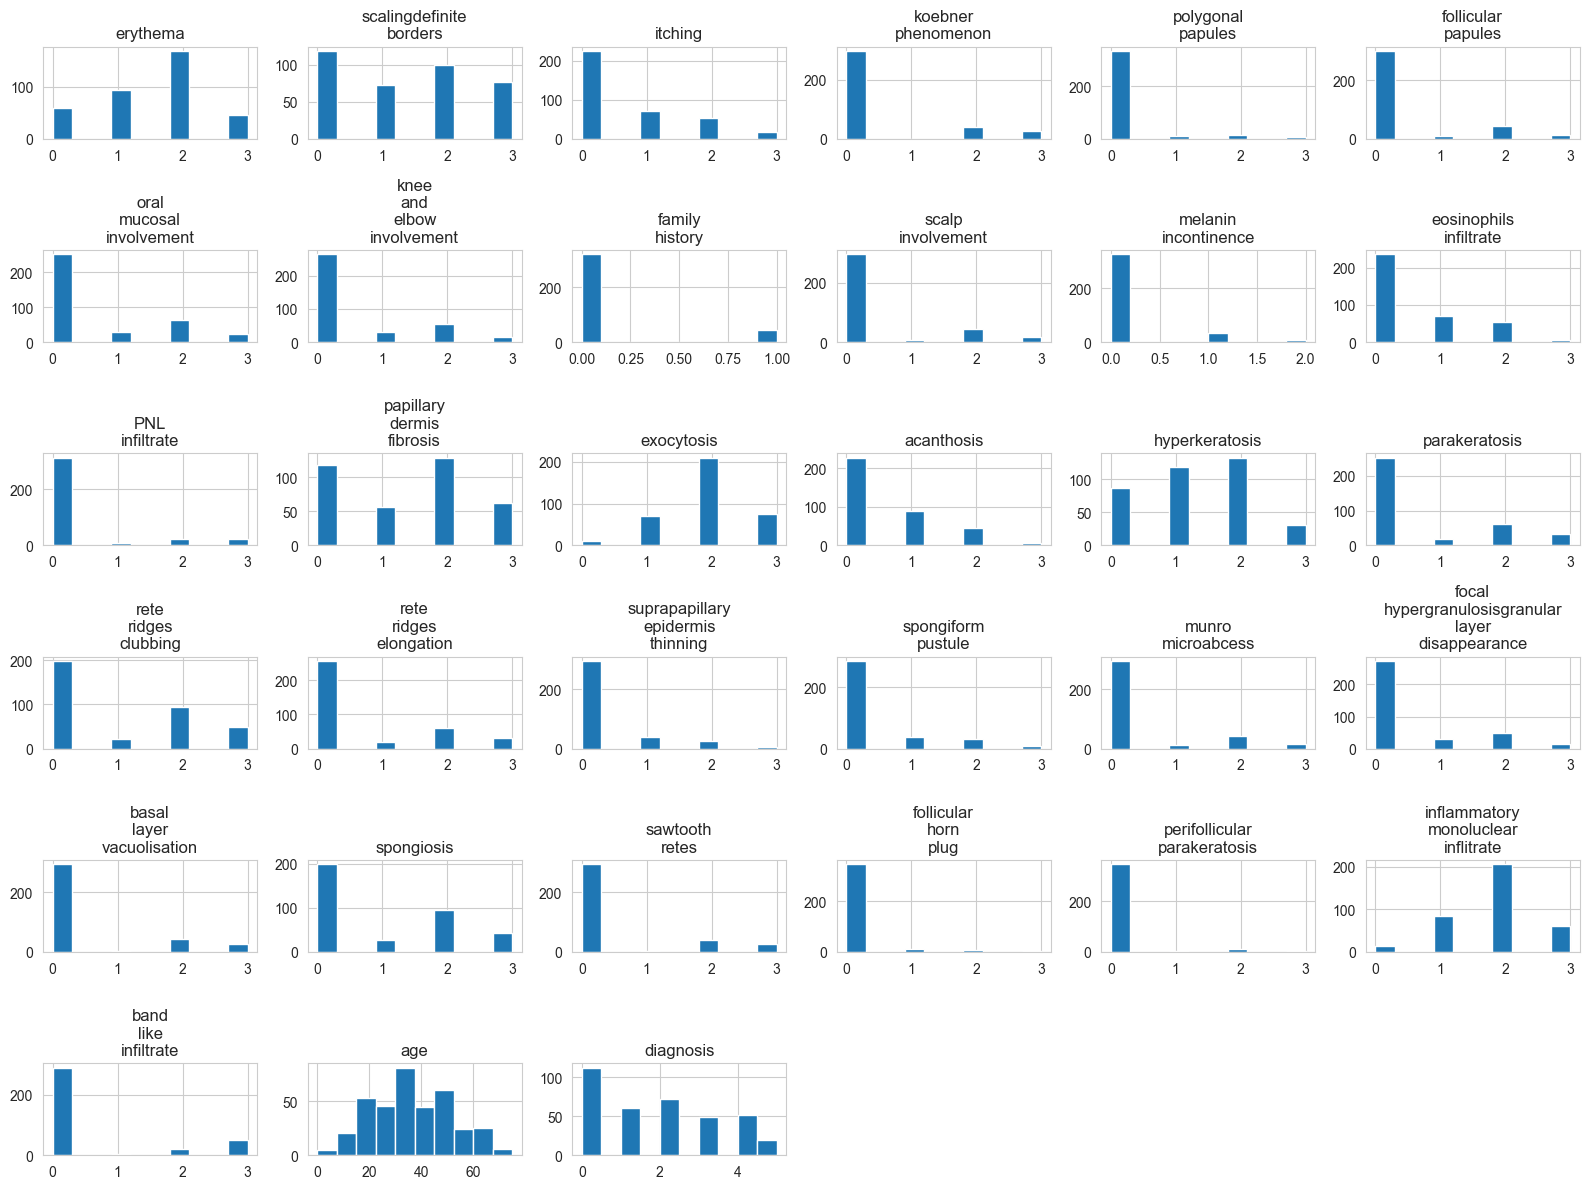

In [86]:
df.hist(figsize=(16, 12), sharex=False, sharey=False)
for ax, col in zip(plt.gcf().axes, df.select_dtypes('number').columns):
    ax.set_title(col.replace('_', '\n'), fontsize=12, pad=6)
plt.tight_layout()
plt.show()

From the histograms above, we can see that most features span a range of 0-3. The documentation of the data set indicates this represents the severity of the symptom. We can see that zeroes are generally the most prevelant.

An additional important thing to note is that the data set is not balanced. There are approximately twice as many diagnoses of "0" as there are of 1-4. And the diagnosis of 5 is rare in comparison. We will need to take care to monitor this when evaluating our models. It suggests we may need to use f1 rather than accuracy as accuracy could be influenced by the imbalanced data set.


In [87]:
#As a final step, we will separate the training and label data into X and y
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

## EDA Visualization and Feature Engineering with Principal Component Analysis (PCA) ##

Principal Component Analysis is primarily a dimensionality rediuction technique. But it can also be used to project a dataset onto two dimensions for visualization. (GeeksforGeeks, 2025) The dimensionality reduction can later be used in models and is a kind of feature engineering.



In [88]:
#PCA works better with scaled data (GeeksforGeeks 2025)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#transform to 2 primary components
pca = PCA(n_components=2)
pca_out_df_2 = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.28626792 0.167312  ]
Cumulative Explained Variance: [0.28626792 0.45357992]


Two primary components explain cumulatively less than half of the variance. The graph below shows the classes are quite intermingled when projected onto two features.

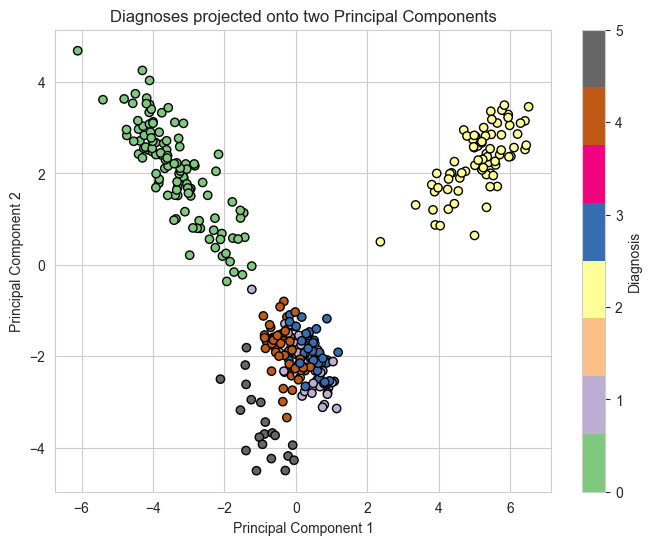

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(pca_out_df_2[:, 0], pca_out_df_2[:, 1], c=y, cmap='Accent', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Diagnoses projected onto two Principal Components")
plt.colorbar(label="Diagnosis")
plt.show()

Note that classes 0 and 2 are well separated. 5 is also separated. But 1, 3, 4 are intermingled.

Let's see whether a third principal component helps to separate the data


In [90]:
pca = PCA(n_components=3)
pca_out_df_3 = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))


Explained variance: [0.28626792 0.167312   0.09644135]
Cumulative Explained Variance: [0.28626792 0.45357992 0.55002127]


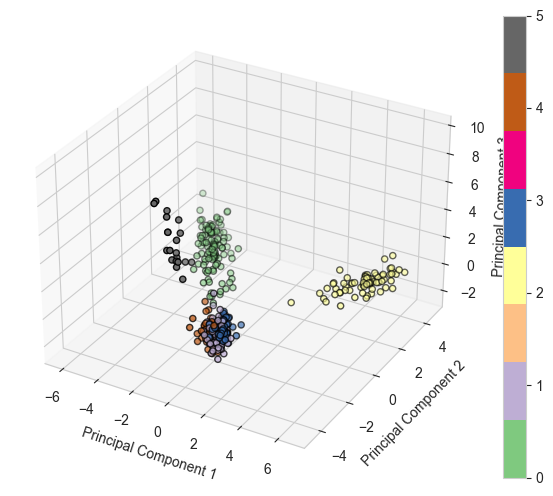

In [91]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

p = ax.scatter(pca_out_df_3[:, 0], pca_out_df_3[:, 1], pca_out_df_3[:, 2], c=y, cmap='Accent', edgecolor='k')
fig.colorbar(p)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

The third principal component only raised our cumulative explanation of variance to 55%. The same classes are clustered together in three dimensions as were in two. This tells me we will probably have good results clustering classes 0, 2, and 5, but less success with the others.

As one more exercise, let's see how much of the variance we can account for with more principal components

In [104]:
pca_results = {}
pca_explained_variance = {}
for i in range(1, 25):
    my_pca = PCA(n_components=i)
    my_pca_result = my_pca.fit_transform(X_scaled)
    pca_results[i] = my_pca_result
    pca_explained_variance[i] = np.sum(my_pca.explained_variance_ratio_, axis=0)
    print(f"Components: {i} Cumulative Explained Variance:{np.sum(my_pca.explained_variance_ratio_, axis=0)}")



Components: 1 Cumulative Explained Variance:0.2862679187730273
Components: 2 Cumulative Explained Variance:0.4535799175653913
Components: 3 Cumulative Explained Variance:0.550021265005812
Components: 4 Cumulative Explained Variance:0.6078177350416397
Components: 5 Cumulative Explained Variance:0.6477606542038471
Components: 6 Cumulative Explained Variance:0.6849514663998062
Components: 7 Cumulative Explained Variance:0.7151006309989985
Components: 8 Cumulative Explained Variance:0.744984874007134
Components: 9 Cumulative Explained Variance:0.7717961446726749
Components: 10 Cumulative Explained Variance:0.7964943415555836
Components: 11 Cumulative Explained Variance:0.820640240384048
Components: 12 Cumulative Explained Variance:0.8421660429615061
Components: 13 Cumulative Explained Variance:0.8630668585600091
Components: 14 Cumulative Explained Variance:0.8811822103963817
Components: 15 Cumulative Explained Variance:0.8988223075390165
Components: 16 Cumulative Explained Variance:0.91273

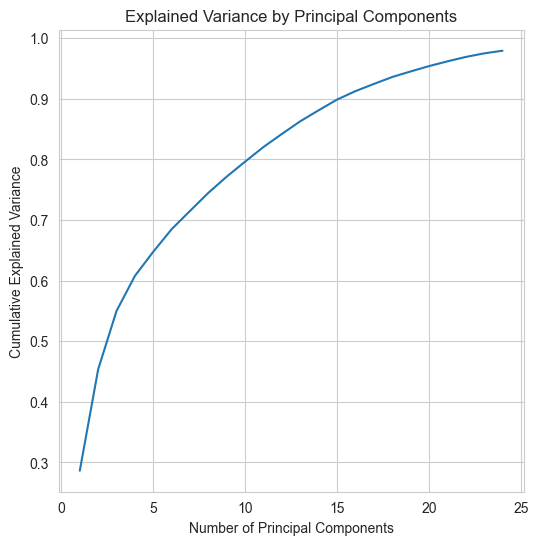

In [105]:
plt.figure(figsize=(6, 6))
plt.plot(pca_explained_variance.keys(), pca_explained_variance.values())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

The graph above shows the increase in how much of the variance can be explained based on the number of principal components used

# Analysis (Model Building and Training) #


In [73]:
#Before we build models, we need a way to map the results of clustering back to the labels in the data.
#The following function accepts the clustering results and the true labels. It returns the clustering results
#after having mapped them to the correct label based on highest f1 score. We use f1 rather than accuracy because of the
#imbalanced data set

def find_best_label_permutation(y_pred):
    y_pred_df = pd.DataFrame(y_pred)
    max_f1 = 0.0
    best_label_permutation = None
    #get  all permutations of (0,1,2,3,4,5)
    permutations = itertools.permutations(range(6))
    #iterate through permutations and replace predicted labels. Compare accuracy
    for permutation in permutations:
        y_permuted = y_pred_df.replace({0: permutation[0], 1: permutation[1], 2: permutation[2],
                                     3: permutation[3], 4: permutation[4], 5: permutation[5] })
        my_f1 = f1_score(y, y_permuted, average='weighted', zero_division=0)
        #if the current f1 is higher that the previous max
        #save it and the permutation as the best
        if my_f1 > max_f1:
            max_f1 = my_f1
            best_label_permutation = y_permuted

    return best_label_permutation, max_f1

def display_results(y_pred):
    print(classification_report(y, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred)).plot()
    disp.ax_.grid(False)
    plt.show()

## KMeans Clustering ##
As a first attempt, we will try using KMeans clustering to cluster the data and then compare how well that matches the known diagnosis labels.

              precision    recall  f1-score   support

           0       0.50      0.14      0.22       112
           1       0.21      0.26      0.23        61
           2       0.31      0.28      0.29        72
           3       0.19      0.33      0.24        49
           4       0.13      0.15      0.14        52
           5       0.41      0.95      0.58        20

    accuracy                           0.26       366
   macro avg       0.29      0.35      0.28       366
weighted avg       0.32      0.26      0.25       366



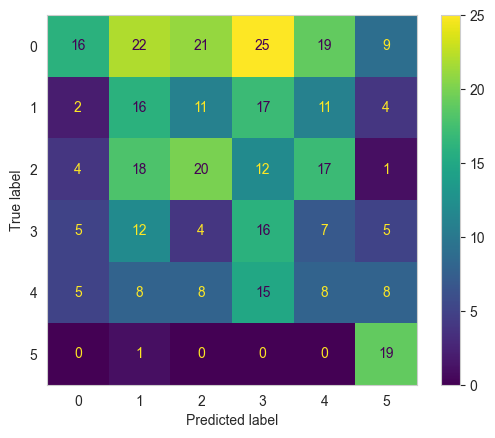

In [78]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(X))
display_results(best_predictions)

Kmeans clustering on the raw data is **essentially useless!** The f1 scores are little better than random assignment of labels would achieve. But the PCA analysis seemed to offer some hope that at least some of the labels were well grouped. So let's try using the results of PCA with 3 components.

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       112
           1       0.37      1.00      0.54        61
           2       1.00      0.99      0.99        72
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        52
           5       1.00      0.70      0.82        20

    accuracy                           0.56       366
   macro avg       0.56      0.54      0.51       366
weighted avg       0.62      0.56      0.54       366



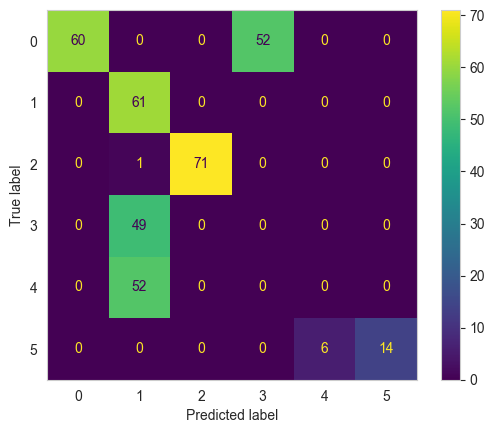

In [106]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_out_df_3))
display_results(best_predictions)

This result is **markedly better.** We see good results on label 2, and ok results on labels 1 and 5. The PCA analysis showed these labels were more isolated than others, and so this makes sense. Our results with categories 1, 3, and 4 is not good. This aligns with how they appeared intermingled after PCA analysis.

Next, let's try 12 and 24 principal components.


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.85      0.36      0.51        61
           2       1.00      0.99      0.99        72
           3       0.52      0.94      0.67        49
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        20

    accuracy                           0.87       366
   macro avg       0.89      0.87      0.86       366
weighted avg       0.91      0.87      0.87       366



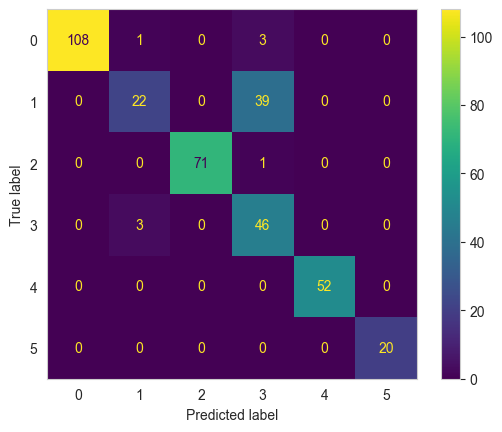

In [107]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_results[12]))
display_results(best_predictions)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       112
           1       0.85      0.36      0.51        61
           2       1.00      0.99      0.99        72
           3       0.00      0.00      0.00        49
           4       0.38      1.00      0.55        52
           5       1.00      1.00      1.00        20

    accuracy                           0.65       366
   macro avg       0.70      0.67      0.64       366
weighted avg       0.75      0.65      0.65       366



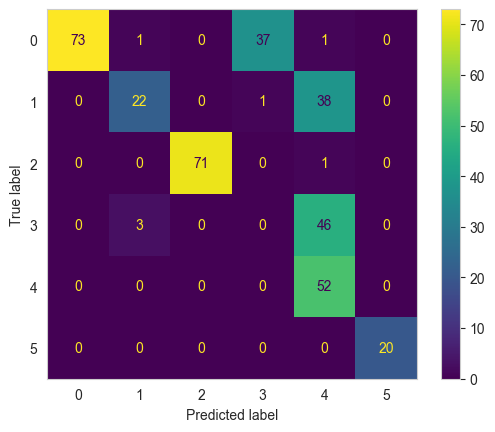

In [108]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_results[24]))
display_results(best_predictions)

### KMeans Results Analysis ###

KMeans has not performed well on most classes. For classes 3 and 4, it got 0 correctly identified labels. Class 2 is the only one that performed well. We can recall from the PCA analysis that class 2 was well separated from the other classes. Because KMeans operates off the centroid of clusters, this category did well. The others did not. Classes 0 and 5 were the only other two classes that KMeans had any success with. The PCA analysis showed these classes were better separated than some of the others. Our KMeans results seem to align well with the PCA analysis.


## Agglomerative Clustering ##
As a next attempt, we will try using Agglomerative clustering to cluster the data and then compare how well that matches the known diagnosis labels.

In [ ]:
agg = AgglomerativeClustering(n_clusters=6)
agg.fit_predict(pca_out_df)
best_predictions, _ = find_best_label_permutation(kmeans.fit_predict(pca_out_df))
display_results(best_predictions)

# Results and Analysis #


# Discussion and Conclusion #

## Learnings and Takeaways ##

## Things That Did Not Work as Expected ##

## Future Improvements ##

# Citations #

- Ilter, N. & Guvenir, H. (1998). Dermatology [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5FK5P.
- GeeksforGeeks. (2025, July 23). Implementing PCA in python with scikit-learn. https://www.geeksforgeeks.org/machine-learning/implementing-pca-in-python-with-scikit-learn/

